In [59]:
# my name and date
my_name = 'Kaiyi Zou'
today = '05/07/2021'

'''
Please note:
The data is coverd from 01/01/2019 to 01/31/2019, including 2 states: New York and New Jersey (I didn't find RI in any of the 
location filter options, so I choose New Jersey instead)
'''

In [82]:
# import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np

# import users and pageview dataset
user = pd.read_csv('user.csv', parse_dates = ['Day Index'])

pageview = pd.read_csv('pageviews.csv', parse_dates = ['Day Index'])

In [63]:
# explore data
print('First 5 row of User df')
print(user.head())

print('\nFirst 5 row of pageview df')
print(pageview.head())

# data structure
print('\ndata structure of User df')
print(user.info())

print('\ndata structure of pageview df')
print(pageview.info())


First 5 row of User df
   Day Index  Users
0 2019-01-01   57.0
1 2019-01-02  123.0
2 2019-01-03   95.0
3 2019-01-04  107.0
4 2019-01-05   63.0

First 5 row of pageview df
   Day Index Pageviews
0 2019-01-01       356
1 2019-01-02       701
2 2019-01-03       522
3 2019-01-04       661
4 2019-01-05       468

data structure of User df
<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Day Index  31 non-null     datetime64[ns]
 1   Users      31 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 744.0 bytes
None

data structure of pageview df
<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Day Index  31 non-null     datetime64[ns]
 1   Pageviews  31 non-null    

,Day Index,Pageviews
0,2019-01-01,356
1,2019-01-02,701
2,2019-01-03,522
3,2019-01-04,661
4,2019-01-05,468
5,2019-01-06,519
6,2019-01-07,925
7,2019-01-08,677
8,2019-01-09,859
9,2019-01-10,866


In [68]:
# there is a empty row in both df
user = user.dropna()
pageview = pageview.dropna()

# change numeric column from object to float
user['Users'] = user['Users'].astype('float')
pageview['Pageviews'] = pageview['Pageviews'].str.replace(',','').astype('float')

,Day Index,Pageviews
0,2019-01-01,356.0
1,2019-01-02,701.0
2,2019-01-03,522.0
3,2019-01-04,661.0
4,2019-01-05,468.0
5,2019-01-06,519.0
6,2019-01-07,925.0
7,2019-01-08,677.0
8,2019-01-09,859.0
9,2019-01-10,866.0


In [73]:
# merge into one data frame
merged = pageview.merge(user, on = 'Day Index')

# explore first 5 row of merged df
merged.head()

,Day Index,Pageviews,Users
0,2019-01-01,356.0,57.0
1,2019-01-02,701.0,123.0
2,2019-01-03,522.0,95.0
3,2019-01-04,661.0,107.0
4,2019-01-05,468.0,63.0


In [76]:
# resturcture pageview df into needed form
# sum pageview by week in pageview df
pageview_week = pageview.copy()

# add a week column
pageview_week['week'] = pageview_week['Day Index'].dt.strftime('%U')

# +1 to week column so it would be more readable
pageview_week['week'] = pageview_week['week'].astype('int') + 1 

# drop Day Index column
pageview_week = pageview_week.drop(['Day Index'], axis = 1)

# sum up pageview by week number
pageview_week = pageview_week.groupby('week')[['Pageviews']].sum().reset_index()

pageview_week.head()

,week,Pageviews
0,1,2708.0
1,2,5119.0
2,3,5190.0
3,4,4314.0
4,5,4108.0


In [75]:
# resturcture merged df into needed form
merged['pageview_per_user'] = merged['Pageviews']/merged['Users']

merged.head()

,Day Index,Pageviews,Users,pageview_per_user
0,2019-01-01,356.0,57.0,6.245614
1,2019-01-02,701.0,123.0,5.699187
2,2019-01-03,522.0,95.0,5.494737
3,2019-01-04,661.0,107.0,6.177570
4,2019-01-05,468.0,63.0,7.428571


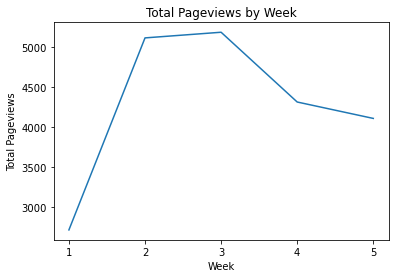

In [86]:
# plot pageview by week
sns.lineplot(x = 'week', y = 'Pageviews', data = pageview_week)
plt.title('Total Pageviews by Week')
plt.xlabel('Week')
plt.ylabel('Total Pageviews')
plt.xticks(np.arange(1, max(pageview_week['week']+1), 1))
plt.show()

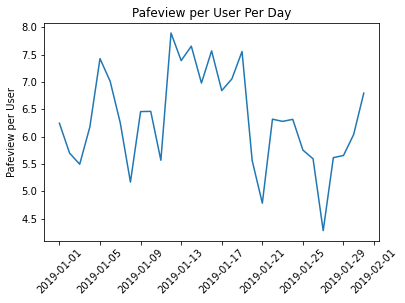

In [90]:
# plot pageview/user by day
sns.lineplot(x = 'Day Index', y = 'pageview_per_user', data = merged)
plt.title('Pafeview per User Per Day')
plt.xlabel('')
plt.xticks(rotation = 45)
plt.ylabel('Pafeview per User')
plt.show()